# Using Historical Data to Predict Batting Success: Step 2 Filtering Dataset

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Step 2 of Data Preparation: Filtering Down the Dataset

The first attempt included the entire dataset, but this provided significant issues since...

## Environment Setup

Import and establish environment for initial work, including showing all dataframe column values.

In [29]:
import pandas as pd

pd.set_option('display.max_columns', None)

Load in the two stored data files: `./data/core_mlb_dataset.csv` and `./data/hof_dataset.csv` so we can continue with pre-processing the data.


In [30]:
core_mlb_dataset = "./data/core_mlb_dataset.csv"
df = pd.read_csv(core_mlb_dataset)
df

,ID,Player,Tm,Opp,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Result,Season
0,delahed01,Ed Delahanty,PHI,BRO,5,4,1,2,0,0,0,0,1,0,0,0,0,L,1901
1,dolanjo02,Joe Dolan,PHI,BRO,5,5,0,1,0,0,0,1,0,0,0,0,0,L,1901
2,childcu01,Cupid Childs,CHC,STL,5,5,1,1,0,0,0,0,0,0,0,0,0,W,1901
3,crolifr01,Fred Crolius,BSN,NYG,4,4,0,0,0,0,0,1,0,0,0,0,0,W,1901
4,delahed01,Ed Delahanty,PHI,BRO,4,4,0,0,0,0,0,0,0,2,0,0,0,L,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715517,woodfja01,Jake Woodford,STL,CHC,2,1,0,0,0,0,0,0,0,0,0,1,0,L,2021
3715518,yastrmi01,Mike Yastrzemski,SFG,SDP,4,3,1,1,1,0,0,2,1,1,0,0,0,W,2021
3715519,zimmebr01,Bradley Zimmer,CLE,TEX,4,4,1,2,0,0,0,1,0,0,0,0,0,W,2021
3715520,zimmery01,Ryan Zimmerman,WSN,BOS,4,3,0,0,0,0,0,1,1,2,0,0,0,L,2021


In [31]:
hof_dataset = "./data/hof_dataset.csv"
hof = pd.read_csv(hof_dataset)
hof

,ID,Inductee
0,hodgegi01,1
1,kaatji01,1
2,minosmi01,1
3,olivato01,1
4,ortizda01,1
...,...,...
263,cobbty01,1
264,johnswa01,1
265,mathech01,1
266,ruthba01,1


## Preprocessing - Continued

### Filtering Player Data

With the realization that filtering the player data should help for accuracy, the following approach will be taken:
- split data into two sets
 - before 2012 (the data we'll be training on)
 - 2012-2021 (the last 10 years, reserved for later)
- only players with 10 or more seasons in the major leagues

Splitting the data into two sets, first the 1901-2011 data.

In [32]:
data = df[df['Season'] < 2012].copy()
data

,ID,Player,Tm,Opp,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Result,Season
0,delahed01,Ed Delahanty,PHI,BRO,5,4,1,2,0,0,0,0,1,0,0,0,0,L,1901
1,dolanjo02,Joe Dolan,PHI,BRO,5,5,0,1,0,0,0,1,0,0,0,0,0,L,1901
2,childcu01,Cupid Childs,CHC,STL,5,5,1,1,0,0,0,0,0,0,0,0,0,W,1901
3,crolifr01,Fred Crolius,BSN,NYG,4,4,0,0,0,0,0,1,0,0,0,0,0,W,1901
4,delahed01,Ed Delahanty,PHI,BRO,4,4,0,0,0,0,0,0,0,2,0,0,0,L,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235593,youngch04,Chris Young,ARI,LAD,2,2,0,0,0,0,0,0,0,2,0,0,0,L,2011
3235594,youngde03,Delmon Young,DET,CLE,4,4,1,1,0,0,0,0,0,1,0,0,0,W,2011
3235595,younger03,Eric Young Jr.,COL,SFG,5,5,1,2,0,1,0,0,0,2,0,0,0,W,2011
3235596,youngmi02,Michael Young,TEX,LAA,4,4,1,1,0,0,0,0,0,0,0,0,0,W,2011


Then, the 2012-2021 data. (For the most recent 10 years.)

In [33]:
recent = df[df['Season'] > 2011].copy()
recent

,ID,Player,Tm,Opp,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Result,Season
3235598,ackledu01,Dustin Ackley,SEA,OAK,5,5,2,2,0,0,1,2,0,1,0,0,0,W,2012
3235599,allenbr01,Brandon Allen,OAK,SEA,4,4,0,0,0,0,0,0,0,2,0,0,0,L,2012
3235600,carpmi01,Mike Carp,SEA,OAK,4,4,0,0,0,0,0,0,0,0,0,0,0,W,2012
3235601,cespeyo01,Yoenis Céspedes,OAK,SEA,4,3,0,1,1,0,0,0,0,2,1,0,0,L,2012
3235602,crispco01,Coco Crisp,OAK,SEA,5,5,0,0,0,0,0,0,0,1,0,0,0,L,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715517,woodfja01,Jake Woodford,STL,CHC,2,1,0,0,0,0,0,0,0,0,0,1,0,L,2021
3715518,yastrmi01,Mike Yastrzemski,SFG,SDP,4,3,1,1,1,0,0,2,1,1,0,0,0,W,2021
3715519,zimmebr01,Bradley Zimmer,CLE,TEX,4,4,1,2,0,0,0,1,0,0,0,0,0,W,2021
3715520,zimmery01,Ryan Zimmerman,WSN,BOS,4,3,0,0,0,0,0,1,1,2,0,0,0,L,2021


Next, to identify players with 10 seasons (or more) played within this time period.

In [34]:
columns = ['ID', 'Player','PA','AB','R','H','2B','3B','HR','RBI','BB','SO','HBP','SH', 'SF']
summables = ['PA','AB','R','H','2B','3B','HR','RBI','BB','SO','HBP','SH', 'SF']
filterable = ['ID', 'Player', 'Season']

In [35]:
group_data = data.groupby(filterable)

group_recent = recent.groupby(filterable)

group_alldata = df.groupby(filterable)

In [36]:
group_recent = group_recent[columns].sum().copy()
group_alldata = group_alldata[columns].sum().copy()

group_data = group_data[columns].sum().copy()
group_data

PA   AB    R    H  2B  3B  HR  RBI  BB  SO  \
ID        Player          Season                                                
aardsda01 David Aardsma   2006      3    2    0    0   0   0   0    0   0   0   
                          2008      1    1    0    0   0   0   0    0   0   1   
aaronha01 Henry Aaron     1954    509  468   58  131  27   6  13   69  28  39   
                          1955    665  602  106  189  37   9  27  106  49  61   
                          1956    660  609  106  200  34  14  26   92  37  54   
...                               ...  ...  ...  ...  ..  ..  ..  ...  ..  ..   
zuverge01 George Zuverink 1955     29   27    1    5   1   0   0    0   1   7   
                          1956     22   17    0    2   0   0   0    2   1   7   
                          1957     17   14    1    1   0   0   0    0   1   5   
                          1958     10    9    0    2   0   1   0    2   1   2   
                          1959      2    0    0    0   0   0   0    0   2   0   

                                  HBP  SH  SF  
ID        Player          Season               
aardsda01 David Aardsma   2006      0   1   0  
                          2008      0   0   0  
aaronha01 Henry Aaron     1954      3   6   4  
                          1955      3   7   4  
                          1956      2   5   7  
...                               ...  ..  ..  
zuverge01 George Zuverink 1955      0   1   0  
                          1956      0   4   0  
                          1957      0   2   0  
                          1958      0   0   0  
                          1959      0   0   0  

[60672 rows x 13 columns]

In [37]:
group_recent = group_recent.reset_index()
group_alldata = group_alldata.reset_index()

group_data = group_data.reset_index()
group_data

,ID,Player,Season,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF
0,aardsda01,David Aardsma,2006,3,2,0,0,0,0,0,0,0,0,0,1,0
1,aardsda01,David Aardsma,2008,1,1,0,0,0,0,0,0,0,1,0,0,0
2,aaronha01,Henry Aaron,1954,509,468,58,131,27,6,13,69,28,39,3,6,4
3,aaronha01,Henry Aaron,1955,665,602,106,189,37,9,27,106,49,61,3,7,4
4,aaronha01,Henry Aaron,1956,660,609,106,200,34,14,26,92,37,54,2,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60667,zuverge01,George Zuverink,1955,29,27,1,5,1,0,0,0,1,7,0,1,0
60668,zuverge01,George Zuverink,1956,22,17,0,2,0,0,0,2,1,7,0,4,0
60669,zuverge01,George Zuverink,1957,17,14,1,1,0,0,0,0,1,5,0,2,0
60670,zuverge01,George Zuverink,1958,10,9,0,2,0,1,0,2,1,2,0,0,0


In [38]:
group_recent['Number of Seasons'] = 1
group_alldata['Number of Seasons'] = 1


group_data['Number of Seasons'] = 1
group_data

,ID,Player,Season,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
0,aardsda01,David Aardsma,2006,3,2,0,0,0,0,0,0,0,0,0,1,0,1
1,aardsda01,David Aardsma,2008,1,1,0,0,0,0,0,0,0,1,0,0,0,1
2,aaronha01,Henry Aaron,1954,509,468,58,131,27,6,13,69,28,39,3,6,4,1
3,aaronha01,Henry Aaron,1955,665,602,106,189,37,9,27,106,49,61,3,7,4,1
4,aaronha01,Henry Aaron,1956,660,609,106,200,34,14,26,92,37,54,2,5,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60667,zuverge01,George Zuverink,1955,29,27,1,5,1,0,0,0,1,7,0,1,0,1
60668,zuverge01,George Zuverink,1956,22,17,0,2,0,0,0,2,1,7,0,4,0,1
60669,zuverge01,George Zuverink,1957,17,14,1,1,0,0,0,0,1,5,0,2,0,1
60670,zuverge01,George Zuverink,1958,10,9,0,2,0,1,0,2,1,2,0,0,0,1


In [39]:
career_recent = group_recent.groupby(['ID','Player']).sum()
del career_recent['Season']
career_recent

career_alldata = group_alldata.groupby(['ID','Player']).sum()
del career_alldata['Season']
career_alldata

career_data = group_data.groupby(['ID','Player']).sum()
del career_data['Season']
career_data

,,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
ID,Player,,,,,,,,,,,,,,
aardsda01,David Aardsma,4,3,0,0,0,0,0,0,0,1,0,1,0,2
aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
aaronto01,Tommie Aaron,1045,944,99,216,42,6,13,94,85,145,0,9,6,7
aasedo01,Don Aase,5,5,0,0,0,0,0,0,0,3,0,0,0,1
abadan01,Andy Abad,25,21,1,2,0,0,0,0,4,5,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuletju01,Julio Zuleta,191,174,23,43,11,0,9,36,10,51,6,0,1,2
zupcibo01,Bob Zupcic,886,795,93,199,47,4,7,80,57,137,6,20,8,4
zupofr01,Frank Zupo,8,7,1,2,1,0,0,0,1,2,0,0,0,3


In [40]:
career_recent = career_recent.reset_index()
career_recent

career_alldata = career_alldata.reset_index()
career_alldata

career_data = career_data.reset_index()
career_data

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
0,aardsda01,David Aardsma,4,3,0,0,0,0,0,0,0,1,0,1,0,2
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
2,aaronto01,Tommie Aaron,1045,944,99,216,42,6,13,94,85,145,0,9,6,7
3,aasedo01,Don Aase,5,5,0,0,0,0,0,0,0,3,0,0,0,1
4,abadan01,Andy Abad,25,21,1,2,0,0,0,0,4,5,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12457,zuletju01,Julio Zuleta,191,174,23,43,11,0,9,36,10,51,6,0,1,2
12458,zupcibo01,Bob Zupcic,886,795,93,199,47,4,7,80,57,137,6,20,8,4
12459,zupofr01,Frank Zupo,8,7,1,2,1,0,0,0,1,2,0,0,0,3
12460,zuvelpa01,Paul Zuvella,545,491,40,109,17,2,2,20,34,50,2,18,0,8


**Note:** Need to get rid of players with no At Bats before calculating the averages.

In [41]:
career_recent = career_recent[career_recent['AB'] > 0 ].copy()
career_recent

career_alldata = career_alldata[career_alldata['AB'] > 0 ].copy()
career_alldata

career_data = career_data[career_data['AB'] > 0 ].copy()
career_data

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
0,aardsda01,David Aardsma,4,3,0,0,0,0,0,0,0,1,0,1,0,2
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
2,aaronto01,Tommie Aaron,1045,944,99,216,42,6,13,94,85,145,0,9,6,7
3,aasedo01,Don Aase,5,5,0,0,0,0,0,0,0,3,0,0,0,1
4,abadan01,Andy Abad,25,21,1,2,0,0,0,0,4,5,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12457,zuletju01,Julio Zuleta,191,174,23,43,11,0,9,36,10,51,6,0,1,2
12458,zupcibo01,Bob Zupcic,886,795,93,199,47,4,7,80,57,137,6,20,8,4
12459,zupofr01,Frank Zupo,8,7,1,2,1,0,0,0,1,2,0,0,0,3
12460,zuvelpa01,Paul Zuvella,545,491,40,109,17,2,2,20,34,50,2,18,0,8


### Different Statistical Formulae

singles (int) = H - (2B + 3B + HR)

total_bases (int) = 1 * singles + 2 * 2B + 3 * 3B + 4 * HR


**AVG (float) = H / AB**

SLG (float) = total_bases / AB

OBP (float) = (H + BB + HBP)/(AB + BB + HBP + SF)

**OPS (float) = SLG + OBP**
https://en.wikipedia.org/wiki/On-base_plus_slugging  *** Reference is great for testing against

RC (float) = total_bases * ( (H + BB) / (AB + BB) )

ISO (float) = (1 * 2B + 2 * 3B + 3 * HR) / AB

PA/SO (float) = PA/SO

#### Simplification of SLG formula??

SLG = ( 1 * (H - (2B + 3B + HR)) + 2 * 2B + 3 * 3B + 4 * HR ) / AB
( H - 2B - 3B - HR + 2 * 2B + 3 * 3B + 4 * HR ) / AB
( H - 2B + 2 * 2B - 3B + 3 * 3B - HR + 4 * HR ) / AB
( H + 2B + 2 * 3B + 3 * HR ) / AB

In [42]:
career_recent['AVG'] = career_recent['H'] / (career_recent['AB']*1.0)
career_recent['SLG'] = (career_recent['H'] + career_recent['2B'] + 2*career_recent['3B'] + 3*career_recent['HR']) / (career_recent['AB']*1.0)
career_recent['OBP'] = (career_recent['H'] + career_recent['BB'] + career_recent['HBP']) / ((career_recent['AB'] + career_recent['BB'] + career_recent['HBP'] + career_recent['SF'])*1.0) 
career_recent['OPS'] = career_recent['SLG'] + career_recent['OBP']


In [43]:
career_alldata['AVG'] = career_alldata['H'] / (career_alldata['AB']*1.0)
career_alldata['SLG'] = (career_alldata['H'] + career_alldata['2B'] + 2*career_alldata['3B'] + 3*career_alldata['HR']) / (career_alldata['AB']*1.0)
career_alldata['OBP'] = (career_alldata['H'] + career_alldata['BB'] + career_alldata['HBP']) / ((career_alldata['AB'] + career_alldata['BB'] + career_alldata['HBP'] + career_alldata['SF'])*1.0) 
career_alldata['OPS'] = career_alldata['SLG'] + career_alldata['OBP']


In [44]:
career_data['AVG'] = career_data['H'] / (career_data['AB']*1.0)
career_data['SLG'] = (career_data['H'] + career_data['2B'] + 2*career_data['3B'] + 3*career_data['HR']) / (career_data['AB']*1.0)
career_data['OBP'] = (career_data['H'] + career_data['BB'] + career_data['HBP']) / ((career_data['AB'] + career_data['BB'] + career_data['HBP'] + career_data['SF'])*1.0) 
career_data['OPS'] = career_data['SLG'] + career_data['OBP']

career_data

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,AVG,SLG,OBP,OPS
0,aardsda01,David Aardsma,4,3,0,0,0,0,0,0,0,1,0,1,0,2,0.000000,0.000000,0.000000,0.000000
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23,0.305503,0.555152,0.374276,0.929429
2,aaronto01,Tommie Aaron,1045,944,99,216,42,6,13,94,85,145,0,9,6,7,0.228814,0.327331,0.290821,0.618152
3,aasedo01,Don Aase,5,5,0,0,0,0,0,0,0,3,0,0,0,1,0.000000,0.000000,0.000000,0.000000
4,abadan01,Andy Abad,25,21,1,2,0,0,0,0,4,5,0,0,0,3,0.095238,0.095238,0.240000,0.335238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12457,zuletju01,Julio Zuleta,191,174,23,43,11,0,9,36,10,51,6,0,1,2,0.247126,0.465517,0.308901,0.774418
12458,zupcibo01,Bob Zupcic,886,795,93,199,47,4,7,80,57,137,6,20,8,4,0.250314,0.345912,0.302540,0.648452
12459,zupofr01,Frank Zupo,8,7,1,2,1,0,0,0,1,2,0,0,0,3,0.285714,0.428571,0.375000,0.803571
12460,zuvelpa01,Paul Zuvella,545,491,40,109,17,2,2,20,34,50,2,18,0,8,0.221996,0.276986,0.275142,0.552128


### It's time to save....

In [45]:
recent_career_dataset = "./data/recent_career_dataset.csv"
df.to_csv(recent_career_dataset, index=False)

all_career_dataset = "./data/all_career_dataset.csv"
df.to_csv(all_career_dataset, index=False)



career_dataset = "./data/career_dataset.csv"
df.to_csv(career_dataset, index=False)

## Filtering the Main Dataset

Now we've created our career statistics records for every player, we want to remove any records with less than 10 seasons played.

In [46]:
career_filtered = career_data[career_data['Number of Seasons'] > 9 ].copy()
career_filtered

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,AVG,SLG,OBP,OPS
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23,0.305503,0.555152,0.374276,0.929429
16,abernte02,Ted Abernathy,204,180,12,25,3,0,0,9,7,74,2,15,0,14,0.138889,0.155556,0.179894,0.335450
23,abreubo01,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16,0.293307,0.480561,0.397019,0.877580
39,adairje01,Jerry Adair,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,13,0.254292,0.346852,0.291598,0.638451
44,adamsbo03,Bobby Adams,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,14,0.269371,0.368695,0.339357,0.708052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12436,zernigu01,Gus Zernial,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,11,0.266244,0.488325,0.332186,0.820511
12440,zimmedo01,Don Zimmer,3523,3218,342,758,127,21,90,348,242,662,13,36,14,12,0.235550,0.371970,0.290508,0.662478
12448,ziskri01,Richie Zisk,5737,5144,681,1477,245,26,207,792,533,910,12,7,41,13,0.287131,0.465591,0.352880,0.818471
12449,zitoba01,Barry Zito,306,257,6,26,0,0,0,7,12,79,0,37,0,11,0.101167,0.101167,0.141264,0.242431


**Note:** We also want to get rid of the number of plate appearances that indicates a player was not batting regularly in games each season, such as a pitcher with a weak bat.

In [47]:
career_filtered = career_filtered[career_filtered['PA'] > 4999 ].copy()
career_filtered

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,AVG,SLG,OBP,OPS
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23,0.305503,0.555152,0.374276,0.929429
23,abreubo01,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16,0.293307,0.480561,0.397019,0.877580
62,adamssp01,Sparky Adams,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,13,0.285714,0.353005,0.342606,0.695611
65,adcocjo01,Joe Adcock,7257,6565,816,1819,293,35,333,1117,588,1052,17,52,35,17,0.277075,0.484539,0.336433,0.820972
118,alfoned01,Edgardo Alfonzo,6108,5385,777,1532,282,18,146,744,596,617,41,31,55,12,0.284494,0.424884,0.356920,0.781803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12383,younger01,Eric Young Sr.,6996,6119,984,1731,327,46,79,543,660,462,89,84,44,15,0.282889,0.390096,0.358796,0.748893
12396,youngmi02,Michael Young,7396,6788,1005,2061,388,52,169,917,499,1082,20,25,64,12,0.303624,0.450796,0.350020,0.800816
12403,yountro01,Robin Yount,12249,11008,1630,3142,583,126,251,1406,966,1350,48,104,123,20,0.285429,0.429688,0.342198,0.771886
12432,zeileto01,Todd Zeile,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,16,0.264624,0.423346,0.346140,0.769487


### Merging with Hall of Fame Data

In [48]:
career_hof = pd.merge(hof, career_filtered, on="ID", how="right")
career_hof

,ID,Inductee,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,AVG,SLG,OBP,OPS
0,aaronha01,1.0,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23,0.305503,0.555152,0.374276,0.929429
1,abreubo01,NaN,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16,0.293307,0.480561,0.397019,0.877580
2,adamssp01,NaN,Sparky Adams,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,13,0.285714,0.353005,0.342606,0.695611
3,adcocjo01,NaN,Joe Adcock,7257,6565,816,1819,293,35,333,1117,588,1052,17,52,35,17,0.277075,0.484539,0.336433,0.820972
4,alfoned01,NaN,Edgardo Alfonzo,6108,5385,777,1532,282,18,146,744,596,617,41,31,55,12,0.284494,0.424884,0.356920,0.781803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,younger01,NaN,Eric Young Sr.,6996,6119,984,1731,327,46,79,543,660,462,89,84,44,15,0.282889,0.390096,0.358796,0.748893
691,youngmi02,NaN,Michael Young,7396,6788,1005,2061,388,52,169,917,499,1082,20,25,64,12,0.303624,0.450796,0.350020,0.800816
692,yountro01,1.0,Robin Yount,12249,11008,1630,3142,583,126,251,1406,966,1350,48,104,123,20,0.285429,0.429688,0.342198,0.771886
693,zeileto01,NaN,Todd Zeile,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,16,0.264624,0.423346,0.346140,0.769487


In [49]:
hof_is_nan = career_hof.loc[pd.isna(career_hof['Inductee'])]
series_of_hof = hof_is_nan.index
career_hof.loc[series_of_hof, 'Inductee'] = 0
career_hof['Inductee'] = career_hof['Inductee'].astype(int)
career_hof

,ID,Inductee,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,AVG,SLG,OBP,OPS
0,aaronha01,1,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23,0.305503,0.555152,0.374276,0.929429
1,abreubo01,0,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16,0.293307,0.480561,0.397019,0.877580
2,adamssp01,0,Sparky Adams,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,13,0.285714,0.353005,0.342606,0.695611
3,adcocjo01,0,Joe Adcock,7257,6565,816,1819,293,35,333,1117,588,1052,17,52,35,17,0.277075,0.484539,0.336433,0.820972
4,alfoned01,0,Edgardo Alfonzo,6108,5385,777,1532,282,18,146,744,596,617,41,31,55,12,0.284494,0.424884,0.356920,0.781803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,younger01,0,Eric Young Sr.,6996,6119,984,1731,327,46,79,543,660,462,89,84,44,15,0.282889,0.390096,0.358796,0.748893
691,youngmi02,0,Michael Young,7396,6788,1005,2061,388,52,169,917,499,1082,20,25,64,12,0.303624,0.450796,0.350020,0.800816
692,yountro01,1,Robin Yount,12249,11008,1630,3142,583,126,251,1406,966,1350,48,104,123,20,0.285429,0.429688,0.342198,0.771886
693,zeileto01,0,Todd Zeile,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,16,0.264624,0.423346,0.346140,0.769487


In [50]:
name_cols = ['ID']
names = df.copy()
names = names[name_cols].copy()
names = names.drop_duplicates(subset=['ID'], keep='first')
names

,ID
0,delahed01
1,dolanjo02
2,childcu01
3,crolifr01
5,demonge01
...,...
3715012,houckta01
3715063,minteaj01
3715191,adonjo01
3715410,paynety01


In [51]:
career_hof = pd.merge(names, career_hof, on="ID", how="right")
career_hof

,ID,Inductee,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,AVG,SLG,OBP,OPS
0,aaronha01,1,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23,0.305503,0.555152,0.374276,0.929429
1,abreubo01,0,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16,0.293307,0.480561,0.397019,0.877580
2,adamssp01,0,Sparky Adams,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,13,0.285714,0.353005,0.342606,0.695611
3,adcocjo01,0,Joe Adcock,7257,6565,816,1819,293,35,333,1117,588,1052,17,52,35,17,0.277075,0.484539,0.336433,0.820972
4,alfoned01,0,Edgardo Alfonzo,6108,5385,777,1532,282,18,146,744,596,617,41,31,55,12,0.284494,0.424884,0.356920,0.781803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,younger01,0,Eric Young Sr.,6996,6119,984,1731,327,46,79,543,660,462,89,84,44,15,0.282889,0.390096,0.358796,0.748893
691,youngmi02,0,Michael Young,7396,6788,1005,2061,388,52,169,917,499,1082,20,25,64,12,0.303624,0.450796,0.350020,0.800816
692,yountro01,1,Robin Yount,12249,11008,1630,3142,583,126,251,1406,966,1350,48,104,123,20,0.285429,0.429688,0.342198,0.771886
693,zeileto01,0,Todd Zeile,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,16,0.264624,0.423346,0.346140,0.769487


In [52]:
career_hof = career_hof[['ID', 'Player', 'Number of Seasons', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'SLG', 'OBP', 'OPS', 'Inductee']]
career_hof

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,AVG,SLG,OBP,OPS,Inductee
0,aaronha01,Henry Aaron,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,0.305503,0.555152,0.374276,0.929429,1
1,abreubo01,Bobby Abreu,16,9669,8128,1412,2384,554,58,284,1325,1419,1763,0.293307,0.480561,0.397019,0.877580,0
2,adamssp01,Sparky Adams,13,6175,5558,839,1588,249,49,9,390,453,222,0.285714,0.353005,0.342606,0.695611,0
3,adcocjo01,Joe Adcock,17,7257,6565,816,1819,293,35,333,1117,588,1052,0.277075,0.484539,0.336433,0.820972,0
4,alfoned01,Edgardo Alfonzo,12,6108,5385,777,1532,282,18,146,744,596,617,0.284494,0.424884,0.356920,0.781803,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,younger01,Eric Young Sr.,15,6996,6119,984,1731,327,46,79,543,660,462,0.282889,0.390096,0.358796,0.748893,0
691,youngmi02,Michael Young,12,7396,6788,1005,2061,388,52,169,917,499,1082,0.303624,0.450796,0.350020,0.800816,0
692,yountro01,Robin Yount,20,12249,11008,1630,3142,583,126,251,1406,966,1350,0.285429,0.429688,0.342198,0.771886,1
693,zeileto01,Todd Zeile,16,8649,7573,986,2004,397,23,253,1110,945,1279,0.264624,0.423346,0.346140,0.769487,0


Checking on the names of the Hall of Famers:

In [53]:
career_hof[career_hof['Inductee'] == 1 ]

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,AVG,SLG,OBP,OPS,Inductee
0,aaronha01,Henry Aaron,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,0.305503,0.555152,0.374276,0.929429,1
7,alomaro01,Roberto Alomar,17,10400,9073,1507,2724,504,80,210,1134,1032,1140,0.300231,0.442852,0.371245,0.814097,1
14,aparilu01,Luis Aparicio,18,10972,10003,1294,2610,383,91,80,770,713,718,0.260922,0.341398,0.309698,0.651095,1
15,applilu01,Luke Appling,20,10254,8856,1317,2750,441,101,45,1110,1313,531,0.310524,0.398374,0.400196,0.798570,1
17,ashburi01,Richie Ashburn,15,9442,8103,1286,2492,305,106,29,577,1169,553,0.307540,0.382081,0.396700,0.778780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,willite01,Ted Williams,19,9598,7566,1768,2592,514,71,510,1806,1970,696,0.342585,0.631509,0.479516,1.111026,1
675,wilsoha01,Hack Wilson,12,5555,4760,885,1460,266,67,244,1063,672,714,0.306723,0.544538,0.394718,0.939255,1
680,winfida01,Dave Winfield,22,12358,11003,1669,3110,540,88,465,1833,1216,1686,0.282650,0.474507,0.352622,0.827129,1
686,yastrca01,Carl Yastrzemski,23,13992,11988,1816,3419,646,59,452,1844,1845,1395,0.285202,0.462045,0.379453,0.841499,1


In [57]:
career_hof.isnull().values.any()


False

In [58]:
# hank_row = career_hof[career_hof['ID'] == 'aaronha01']

# cols = ['Number of Seasons', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'SLG', 'OBP', 'OPS']
# XX = hank_row[cols]

# XX = XX.values
# XX

In [59]:
# inorout = LogReg.predict(XX)
# inorout

Pulling from the larger dataset

In [60]:
# row = career_data[career_data['ID'] == 'zoskyed01']
# row

In [61]:
# cols = ['Number of Seasons', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'SLG', 'OBP', 'OPS']
# XX = row[cols]

# XX = XX.values
# XX

In [62]:
# predict = LogReg.predict(XX)
# predict

### Converting to X and y

In [63]:
y = career_hof[career_hof.columns[-1]]
y = y.values
y

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [64]:
# remove the HOF inductee column, and the string-based fields
num = career_hof.shape[1]
X = career_hof[career_hof.columns[2:num-1]]
X = X.values
X

# X = career[career.columns[2:num-5]]
# X = X.values
# X

array([[2.30000000e+01, 1.36660000e+04, 1.21210000e+04, ...,
        5.55152215e-01, 3.74276292e-01, 9.29428507e-01],
       [1.60000000e+01, 9.66900000e+03, 8.12800000e+03, ...,
        4.80561024e-01, 3.97019251e-01, 8.77580274e-01],
       [1.30000000e+01, 6.17500000e+03, 5.55800000e+03, ...,
        3.53004678e-01, 3.42606392e-01, 6.95611070e-01],
       ...,
       [2.00000000e+01, 1.22490000e+04, 1.10080000e+04, ...,
        4.29687500e-01, 3.42198436e-01, 7.71885936e-01],
       [1.60000000e+01, 8.64900000e+03, 7.57300000e+03, ...,
        4.23346098e-01, 3.46140493e-01, 7.69486591e-01],
       [1.30000000e+01, 5.73700000e+03, 5.14400000e+03, ...,
        4.65590980e-01, 3.52879581e-01, 8.18470561e-01]])

### Visualization(s)

??? Before and after bar graphs?

## Model Selection

### Logistic Regression

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_log = sc.fit_transform(X)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size = 0.2, random_state = 20)

# Import logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Build a logstic regression object
LogReg = LogisticRegression(solver = 'newton-cg')

# Train(fit) model
LogReg.fit(X_train, y_train)

# Predict the data
y_train_predict = LogReg.predict(X_train)
y_test_predict = LogReg.predict(X_test)

# Count percentage of correct predictions
print("The performance of the model")
print("--------------------------------------")
print('Log loss of the model for training set: %.3f' % log_loss(y_train,y_train_predict))
print('Log loss of the model for test set: %.3f' % log_loss(y_test,y_test_predict))

The performance of the model
--------------------------------------
Log loss of the model for training set: 3.355
Log loss of the model for test set: 2.733


In [66]:
# Count percentage of correct predictions
print("The performance of the model:")
print("------------------------------")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix for training set')
print(confusion_matrix(y_train,y_train_predict))

print('Confusion matrix for test set')
print(confusion_matrix(y_test, y_test_predict),'\n')

# Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train,y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_test_predict))

# Precision score
from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train,y_train_predict))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test,y_test_predict))

# Recall score
from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train,y_train_predict))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test,y_test_predict))

# F1 Score
from sklearn.metrics import f1_score
print('F1-measure of the model for training set: %.3f' % f1_score(y_train,y_train_predict))
print('F1-measure of the model for test set: %.3f\n' % f1_score(y_test,y_test_predict))

# AUC score
from sklearn.metrics import roc_auc_score
print('AUC score of the model for training set: %.3f' % roc_auc_score(y_train,y_train_predict))
print('AUC score of the model for test set: %.3f\n' % roc_auc_score(y_test,y_test_predict))
      
# Log loss
print('Log loss of the model for training set: %.3f' % log_loss(y_train,y_train_predict))
print('Log loss of the model for test set: %.3f\n' % log_loss(y_test,y_test_predict))


The performance of the model:
------------------------------
Confusion matrix for training set
[[435  16]
 [ 38  67]]
Confusion matrix for test set
[[122   5]
 [  6   6]] 

Accuracy of the model for training set: 0.903
Accuracy of the model for test set: 0.921

Precision of the model for training set: 0.807
Precision of the model for test set: 0.545

Recall of the model for training set: 0.638
Recall of the model for test set: 0.500

F1-measure of the model for training set: 0.713
F1-measure of the model for test set: 0.522

AUC score of the model for training set: 0.801
AUC score of the model for test set: 0.730

Log loss of the model for training set: 3.355
Log loss of the model for test set: 2.733



## SVC

In [67]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True)
for kernel in ['linear',  'rbf']:  #'poly',
    classifier = svm.SVC(gamma=0.001, kernel=kernel)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    print('For kernel {} the f1 score is: {}'.format(kernel, metrics.f1_score(y_test, predicted, average='micro')))

For kernel linear the f1 score is: 0.8735632183908046
For kernel rbf the f1 score is: 0.8735632183908046


In [68]:
### Weird, this 'poly' doesn't work

# problem...
## https://github.com/scikit-learn/scikit-learn/issues/4648   ## This one shows its small + big values
## https://github.com/scikit-learn/scikit-learn/issues/13557


# from sklearn import svm, metrics
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, shuffle=True)
# for kernel in ['poly']:  #'poly',
#     classifier = svm.SVC(gamma=0.001, kernel=kernel)
#     classifier.fit(X_train, y_train)
#     predicted = classifier.predict(X_test)
#     print('For kernel {} the f1 score is: {}'.format(kernel, metrics.f1_score(y_test, predicted, average='micro')))

In [69]:
### Weird, this works

import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
# _, axes = plt.subplots(1,4)
# for ax, img in zip(axes, digits.images[10:14]):
#     ax.imshow(img, cmap=plt.cm.gray_r)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.25, shuffle=True)
for kernel in ['linear', 'poly', 'rbf']:
    classifier = svm.SVC(gamma=0.001, kernel=kernel)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    print('For kerenl {} the f1 score is: {}'.format(kernel, metrics.f1_score(y_test, predicted, average='micro')))

For kerenl linear the f1 score is: 0.9688888888888889
For kerenl poly the f1 score is: 0.9822222222222222
For kerenl rbf the f1 score is: 0.9866666666666668


## KNN

In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_knn = sc.fit_transform(X)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size = 0.2, random_state = 20)

# Import k-nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier

# Build a k-nearest neighbor object
knn = KNeighborsClassifier(n_neighbors = 2)

# Train(fit) model
knn.fit(X_train, y_train)

# Predict both training and test data with the fitted model
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

# Performance of the model
from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train,y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_test_predict))

Accuracy of the model for training set: 0.928
Accuracy of the model for test set: 0.906



## PCA

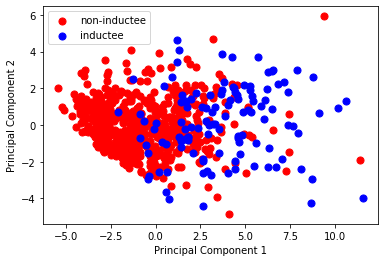

In [71]:
import matplotlib.pyplot as plt


# Import PCA
from sklearn.decomposition import PCA
# Import standar scaler from scikit-learn
from sklearn.preprocessing import StandardScaler


# Define number of classes in the data set
n_classes = 2

X_pca = StandardScaler().fit_transform(X)

# Create a PCA object
pca = PCA(n_components=2)
# Fit the model
principalComponents = pca.fit_transform(X_pca)
ReducedData = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

# Plot the data in two dimensions (PC1 and PC2)
fig = plt.figure() 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2')
# Define names for targets
TargetNames = ['non-inductee', 'inductee']
Colors = ['r', 'b']
for target, color in zip(range(n_classes),Colors):
    indicesToKeep = y == target
    ax.scatter(principalComponents[indicesToKeep, 0], principalComponents[indicesToKeep, 1], c = color, s = 50)
ax.legend(TargetNames)

## Naive Bayes

In [77]:
# Import required packages and functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Import Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# Import Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
# Import Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Load data and split it to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=9)
# Creat Gaussian Naive Bayes object
gnb = GaussianNB()
# fit the model and predict test set
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Print accuracy
print("The accuracy of the Gaussian Naive Bayes on digits data is: %.3f" % (accuracy_score(y_test,y_pred)))
# Create Bernoulli Naive Bayes object
bnb = BernoulliNB()
# fit the model and predict test set
y_pred = bnb.fit(X_train, y_train).predict(X_test)
# print accuracy
print("The accuracy of the Bernoulli Naive Bayes on digits data is: %.3f" % (accuracy_score(y_test,y_pred)))
# Creat Multinomial Naive Bayes object
mnb = MultinomialNB()
# fit the model and predict test set
y_pred = mnb.fit(X_train, y_train).predict(X_test)
# print accuracy
print("The accuracy of the Multinomial Naive Bayes on digits data is: %.3f" % (accuracy_score(y_test,y_pred)))

The accuracy of the Gaussian Naive Bayes on digits data is: 0.836
The accuracy of the Bernoulli Naive Bayes on digits data is: 0.830
The accuracy of the Multinomial Naive Bayes on digits data is: 0.759


## Neural w/keras

In [101]:
import tensorflow as tf
from tensorflow import keras


## Import Sequential from Keras package. ##
# The neural networks are  a linear stack of layers.
# That's why keras calls it "Sequential"
from keras.models import Sequential

## Import Dense from keras layers.##
# A regular fully(densly) connected layer is called a "Dense" in keras
from keras.layers import Dense

## Import clear_session function to reset any previously built models ##
from keras.backend import clear_session

## Import to_categorical function from keras ##
# This function will get a vector of multiple classes (more than two)
# The output will be binary columns 
from keras.utils import to_categorical

# Import train_test_split from sklearn to split the data set.
from sklearn.model_selection import train_test_split





# If you print yy, you will see it includes number from 0 to 9.
# using to_categorical function to create binary columns for each class (10 columns in total)
y_ = to_categorical(y,2) # was 10

# Split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Clear session to make sure that we are not buliding a model on top of a previously built one.
clear_session()

# define the keras model
model = Sequential()

## Add input layer to the model ##
# The layer will be a dense layer. The output of the layer will include 100 units/neurons and the input is 64
# select ReLu function as the activation function 
model.add(Dense(32, input_dim=15, activation='relu'))

## Add first hidden layer ## 
# The input of this layer is defined in last layer (100 units)
# The output is 60 units and the activation is ReLu
model.add(Dense(64, activation='relu'))

model.add(tf.keras.layers.Flatten())

## Add output layer ##
# The input of this layer is 60, and the output is  10 (the number of classes)
model.add(Dense(2, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.9/site-packages/keras/losses.py", line 1930, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.9/site-packages/keras/backend.py", line 5283, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


### 